# plot ACC for each LME along the vertical direction

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4
import numpy as np
from matplotlib import cm,colors,gridspec
import cmcrameri.cm as cmc
import os

In [2]:
USER = os.environ['USER']
var = 'Phi'

In [3]:
path = f'/glade/scratch/{USER}/DPLE-results'
filename = f'{path}/DPLE_LME_vertical_box01-11_ACC_NMAE_{var}_medium_Eo_leadyear_1-10.nc'
ds = xr.open_dataset(filename)
corr_p = ds['corr_p'].values
rcri_p = ds['rcri_p'].values
corr_d = ds['corr_d'].values
rcri_d = ds['rcri_d'].values
corr13 = ds['corr13'].values
rcri13 = ds['rcri13'].values
nmae_p = ds['nmae_p'].values
nmae_d = ds['nmae_d'].values
ds.close()

In [4]:
datadir = '/glade/campaign/cesm/collections/CESM1-DPLE/DPLE-FOSI/rerun_with_extension/timeseries'
filename = f'{datadir}/g.DPLE.GECOIAF.T62_g16.009.chey.pop.h.TEMP.024901-031812.nc'
dset = xr.open_dataset(filename)
dz = dset['dz'].isel(z_t=range(0, 35))/1e2 # m
z_t = -dset['z_t'].isel(z_t=range(0, 35))/1e2 # m
dset.close()
z_t

<xarray.DataArray 'z_t' (z_t: 35)>
array([  -5.     ,  -15.     ,  -25.     ,  -35.     ,  -45.     ,
        -55.     ,  -65.     ,  -75.     ,  -85.     ,  -95.     ,
       -105.     , -115.     , -125.     , -135.     , -145.     ,
       -155.     , -165.0984 , -175.47905, -186.29128, -197.66028,
       -209.71138, -222.57828, -236.40883, -251.37016, -267.6542 ,
       -285.48364, -305.11923, -326.86798, -351.09348, -378.22763,
       -408.78464, -443.3777 , -482.73672, -527.728  , -579.37286],
      dtype=float32)
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.277e+04 5.794e+04

In [5]:
# upper and lower depth of each layer
z_u = z_t + dz/2.
z_d = z_t - dz/2.

In [6]:
# move to surface values for plot
z_t[0] = 0

### plot parameters

In [7]:
from matplotlib import rc, gridspec
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
#
boxna = ['01-EBS','02-GoA','03-CC','04-GoC','05-GoM','06-SEUS','07-NEUS','08-SS','09-LN','10-IPH','11-AI']
boxnb = [1,2,3,4,5,6,7,8,9,10,65]
cols = ['gold','orangered','orangered','dodgerblue','gold','dodgerblue','orangered','dodgerblue','gold','orangered','dodgerblue']

### significance tests

In [8]:
import tools_corrstats
corr_f = corr_d - corr_p
nmae_f = nmae_p - nmae_d
#
pmask = corr_p > rcri_p
dmask = corr_d > rcri_d
# Test ACC difference significance
lenn = 2007+1-1954
t_cr, p_cr = tools_corrstats.dependent_corr(corr_p, corr_d, corr13, lenn-1, twotailed=False, method='steiger')
#
alpha = 0.05
smask = p_cr <= alpha
fmask = corr_f > 0.
ffmask = ~(~fmask + ~smask)# + ~dmask)

### Plot Supp Figure 5

1 0
2 1
3 2
4 3
5 4
6 5
7 6
8 7
9 8
10 9
65 10


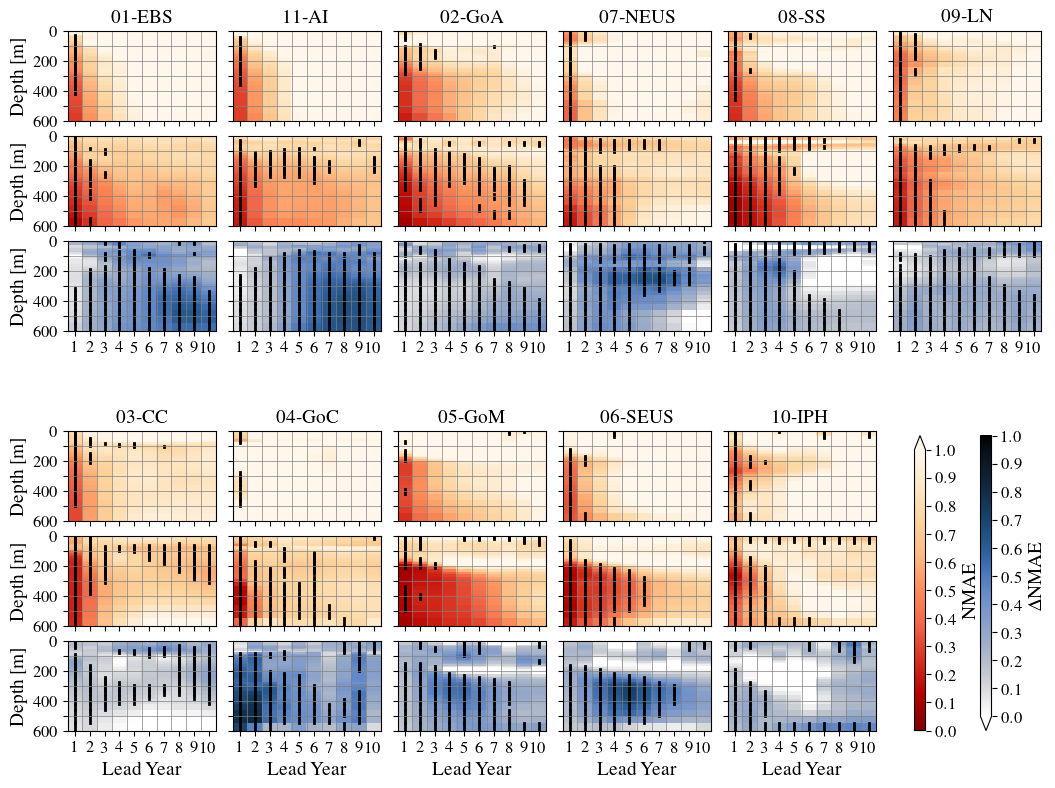

In [10]:
fig = plt.figure(figsize=[11, 10])
gs = gridspec.GridSpec(1, 3)
#
ldd,ztt = np.meshgrid(np.arange(0.5,10,1),z_t)
cmin = 0.;cmax = 1.;clev = 25.
dc = (cmax - cmin)/clev; vct = np.arange(cmin, cmax+dc, dc)
pal_normt = colors.BoundaryNorm(vct, ncolors=256, clip = False)
##
newbox = list(zip(boxnb, range(len(boxnb))))
boxloc = np.ones([len(boxnb),2])
boxloc[0,0],boxloc[10,0],boxloc[1,0],boxloc[6,0],boxloc[7,0],boxloc[8,0] = np.arange(0.06,0.96,0.15)
boxloc[0,1],boxloc[10,1],boxloc[1,1],boxloc[6,1],boxloc[7,1],boxloc[8,1] = 0.5*np.ones(6)
boxloc[2,0],boxloc[3,0],boxloc[4,0],boxloc[5,0],boxloc[9,0] = np.arange(0.06,0.81,0.15)
boxloc[2,1],boxloc[3,1],boxloc[4,1],boxloc[5,1],boxloc[9,1] = 0.1*np.ones(5)
#
for box, ii in newbox:
    print(box,ii)
    for tt,corr,omask in [[2,nmae_p,pmask],[1,nmae_d,dmask],[0,nmae_f,ffmask]]:
        ax = fig.add_axes([boxloc[ii][0],boxloc[ii][1]+0.105*tt,0.135,0.09])
        # plot ACCs
        if tt > 0:
            cd1 = ax.pcolor(ldd.T,ztt.T,corr[ii], cmap=cm.OrRd_r, vmin = 0.,vmax = 1.)
        else:
            cd2 = ax.pcolor(ldd.T,ztt.T,corr[ii], cmap=cmc.oslo_r, vmin = 0.,vmax = 1.)
        # plot bars where ACC significant at 95% confidence level
        for ll in range(10):
            for pp in range(len(z_t)):
                if omask[ii,ll,pp] == True:
                    ax.plot([ll+.5,ll+.5],[z_d[pp],z_u[pp]],lw=2.,color='k')
        # plot grid lines
        for kk in range(1,10):
            ax.plot([kk,kk],[-600,0],lw=0.5,color='gray')
        for kk in range(-500,0,100):
            ax.plot([0,10],[kk,kk],lw=0.5,color='gray')
        # ticks & labels
        ax.set_yticks(np.arange(-600, 1, 100))
        ax.set_xticks(np.arange(0.5, 10, 1))
        if tt == 0:
            ax.set_xticklabels(['%d' % dd for dd in np.arange(1, 11, 1)],fontsize=12)
        else:
            ax.set_xticklabels('')
        if tt == 2:
            ax.set_title(boxna[ii], fontsize=14, fontweight='bold')
        if box in [1,3]:
            ax.set_ylabel('Depth [m]', fontsize=14, fontweight='bold')
            ax.set_yticklabels(['600','','400','','200','','0'],fontsize=12)
        else:
            ax.set_yticklabels('')
        if box in [3,4,5,6,10] and tt == 0:
            ax.set_xlabel("Lead Year", fontsize=14, fontweight='bold')
        ax.set_xlim(0, 10)
        ax.set_ylim(-600, 0)
# colorbars
cbaxes = fig.add_axes([0.83, 0.10, 0.01, 0.295])
cb = plt.colorbar(cd1, orientation="vertical", cax=cbaxes, extend='max', ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
cb.ax.tick_params(labelsize=12)
cb.set_label(label='NMAE', fontsize=14, fontweight='bold')
#
cbaxes = fig.add_axes([0.89, 0.10, 0.01, 0.295])
cb = plt.colorbar(cd2, orientation="vertical", cax=cbaxes, extend='min', ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
cb.ax.tick_params(labelsize=12)
cb.set_label(label='$\Delta$NMAE', fontsize=14, fontweight='bold')
#
output = f'/glade/scratch/{USER}/DPLE-plots'
outfile = f'{output}/Supp_Figure5_LME_box01-11_Pers_DPLE_NMAE_{var}_medium_Eo_vertical_distribution_leadyear1-10.png'
plt.savefig(outfile, dpi=400, transparent=True)
plt.show()